In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


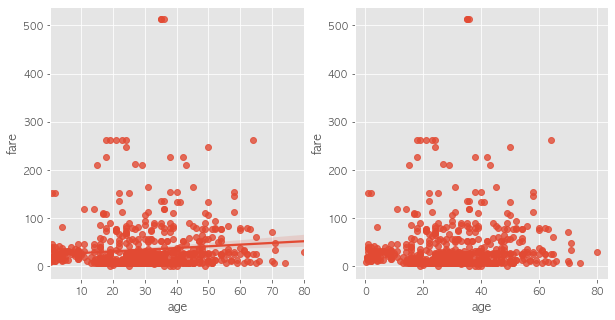

In [5]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)
plt.show()

/Users/jaehyeong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


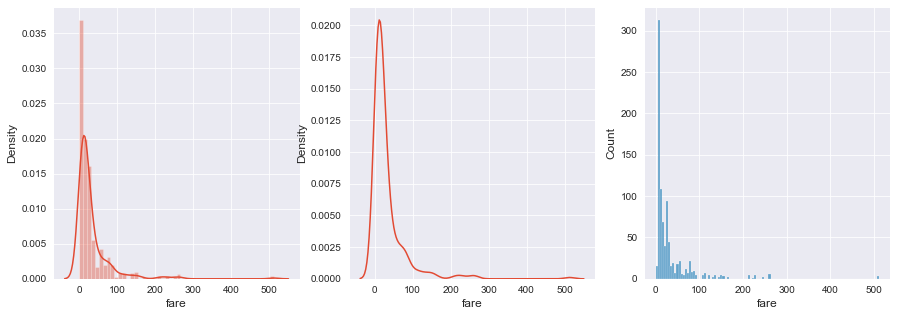

In [7]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic['fare'], ax=ax1)

sns.kdeplot(x='fare', data=titanic, ax=ax2)

sns.histplot(x='fare', data=titanic, ax=ax3)

plt.show()

In [10]:
sns.set_style('darkgrid')

table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [18]:
table.Second.male

108

In [19]:
titanic[titanic['sex']=='male']['class'].value_counts()

Third     347
First     122
Second    108
Name: class, dtype: int64

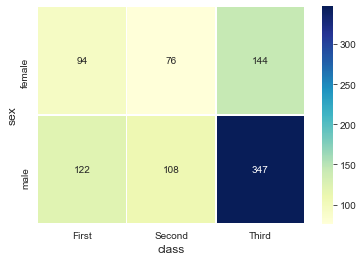

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=0.5, cbar=True)
plt.show()

/Users/jaehyeong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


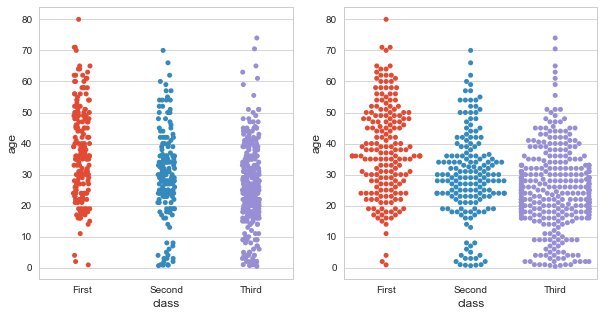

In [21]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1)
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)
plt.show()

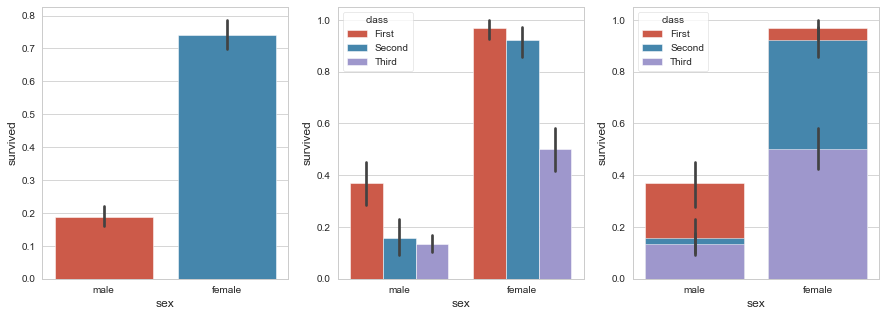

In [23]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

plt.show()

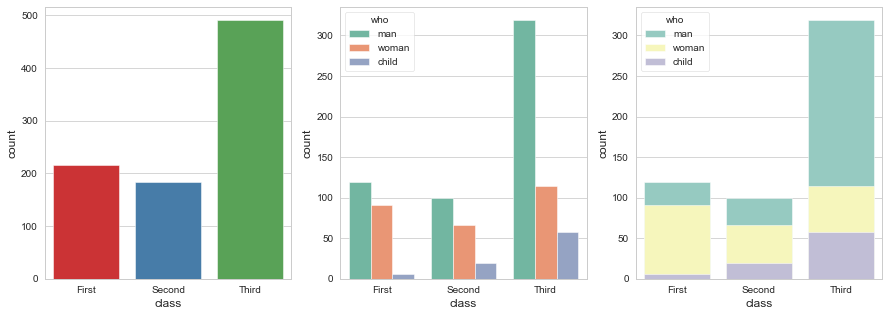

In [24]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set2',data=titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set3',dodge=False, data=titanic, ax=ax3)

plt.show()

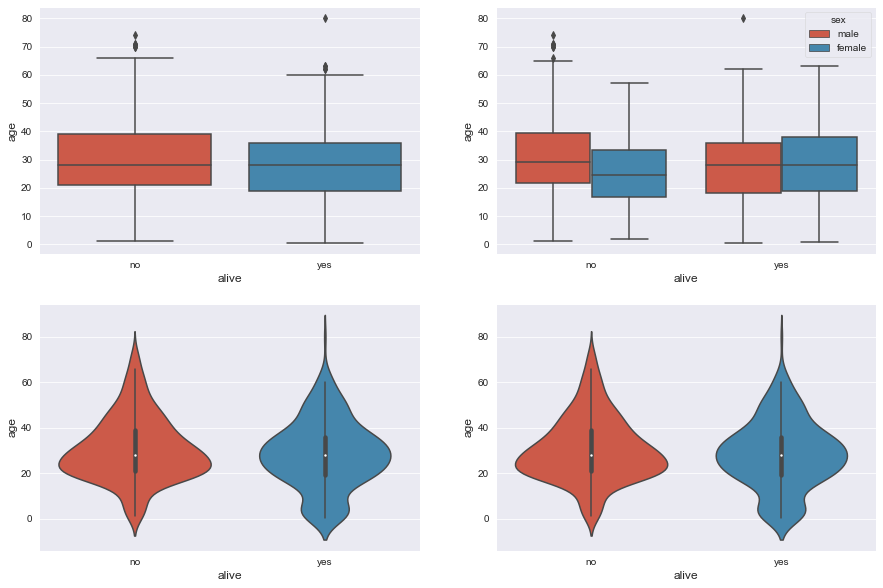

In [26]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax4)

plt.show()

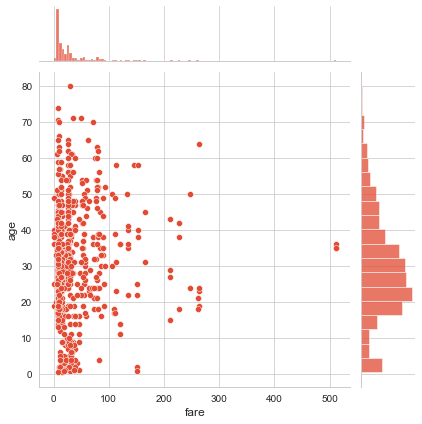

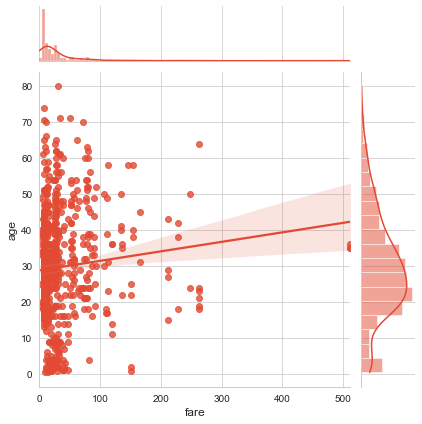

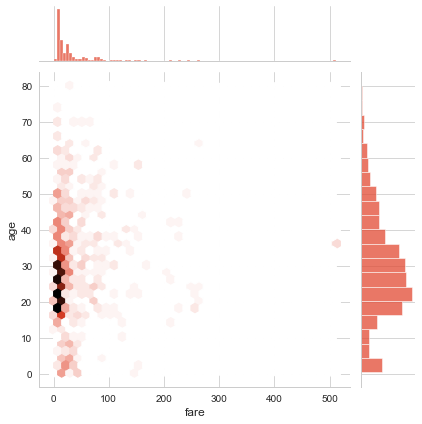

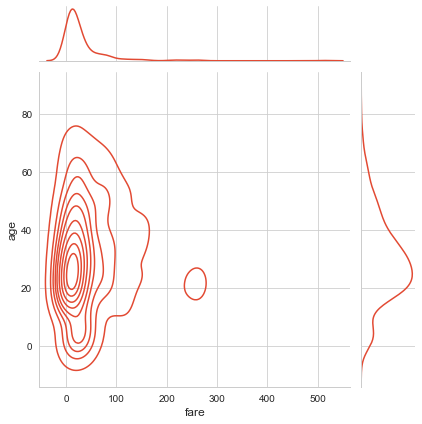

In [28]:
sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
j3 = sns.jointplot(x='fare', y='age', data=titanic, kind='hex')
j4 = sns.jointplot(x='fare', y='age', data=titanic, kind='kde')

plt.show()

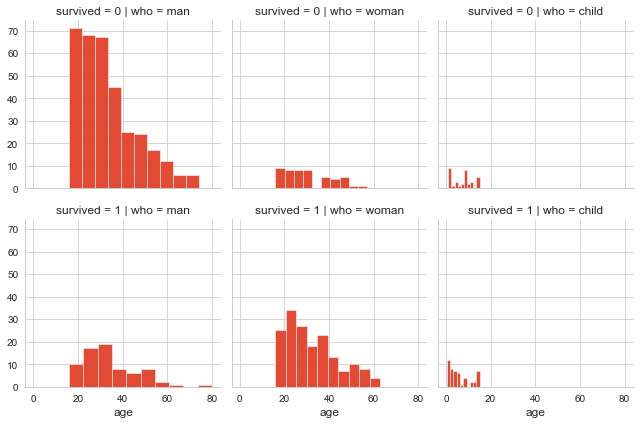

In [32]:
sns.set_style('whitegrid')

g = sns.FacetGrid(data=titanic, col='who', row='survived')
g = g.map(plt.hist, 'age')

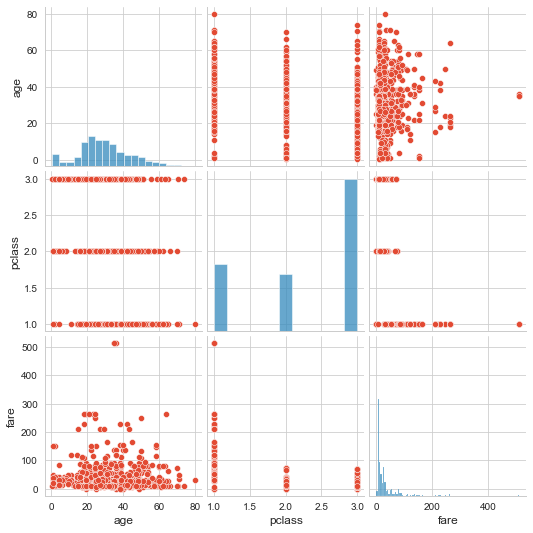

In [33]:
titanic_pair = titanic[['age', 'pclass', 'fare']]

g = sns.pairplot(titanic_pair)

In [36]:
# !pip install folium

In [37]:
import folium

In [39]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)
seoul_map

In [40]:
seoul_map.save('./output/seoul.html')

In [41]:
ls -al output

total 128
drwxr-xr-x  11 jaehyeong  staff    352 11 19 11:09 ./
drwxr-xr-x  33 jaehyeong  staff   1056 11 19 11:10 ../
-rw-r--r--   1 jaehyeong  staff   6119 11 16 10:40 df_excelwriter.xlsx
-rw-r--r--   1 jaehyeong  staff     59 11 16 10:23 df_sample.csv
-rw-r--r--   1 jaehyeong  staff    148 11 16 10:28 df_sample.json
-rw-r--r--   1 jaehyeong  staff   5513 11 16 10:32 df_sample.xlsx
-rw-r--r--   1 jaehyeong  staff     66 11 16 10:27 df_sample1.csv
-rw-r--r--   1 jaehyeong  staff     59 11 16 10:27 df_sample2.csv
-rw-r--r--@  1 jaehyeong  staff  11053 11 16 14:48 gdp_per_capital.png
-rw-r--r--   1 jaehyeong  staff   3004 11 19 11:09 seoul.html
-rw-r--r--@  1 jaehyeong  staff  13921 11 16 15:11 test1.png


In [42]:
seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner', zoom_start=12)
display(seoul_map2)
display(seoul_map3)

seoul_map2.save('./output/seoul2.html')
seoul_map3.save('./output/seoul3.html')

In [44]:
seoul_map4 = folium.Map(location=[37.55, 126.98], tiles='Stamen Watercolor', zoom_start=12)
seoul_map4

In [48]:
df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
df.columns = ['학교명', '위도', '경도']

seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng], 
                        radius=10, color='brown', fill_color='coral', fill_opacity=0.7,
                        popup=name
    ).add_to(seoul_map)
    
display(seoul_map)

In [49]:
df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
df.columns = ['학교명', '위도', '경도']

seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng], 
                        popup=name
    ).add_to(seoul_map)
    
display(seoul_map)

In [100]:
import json
file_path = './data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')
df.columns = df.columns.map(str)

geo_path = './data/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
    
geo_data

g_map = folium.Map(location=[37.5502, 126.982], tiles='Stamen Terrain', zoom_start=9)

year = '2017'

fmap = folium.Choropleth(geo_data = geo_data,
                      data=df[year], columns=[df.index, df[year]],
                      fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.3,
                      threshold_scale=[10000, 100000, 300000, 500000, 700000],
                      key_on='featur.properties.name').add_to(g_map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonPopup(['name'], labels=False)
)


dispaly(g_map)
g_map.save('./output/gyonggi_population_'+year+'.html')

AttributeError: 'NoneType' object has no attribute 'get'

In [102]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

tooltip = '클릭하세요!'
folium.Marker([27.55, 126.98], popup='<div style="width: 100px; color:grenn; text-align:center;">남산</div>', tooltip=tooltip).add_to(seoul_map)
folium.Marker([27.58, 126.975], popup='<div style="width: 100px; color:grenn; text-align:center;"><b>경북궁</b></div>', tooltip=tooltip).add_to(seoul_map)
display(seoul_map)

In [101]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

tooltip = '클릭하세요!'

test = folium.Html('<h3>테스트가 달 되면 좋겠다!!</h3>', script=True)
popup = folium.Popup(test, max_width=300, min_width=300)
icon = folium.map.Icon(color='red', icon='info-sign')

folium.Marker([37.55, 126.98], popup=popup, icon=icon, tooltip=tooltip).add_to(seoul_map)
display(seoul_map)

In [94]:
pop = pd.read_csv('./data/cctv_seoul.csv')
pop

,구별,CCTV수,인구수,한국인,외국인,고령자
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
1,강동구,773,453233.0,449019.0,4214.0,54622.0
2,강북구,748,330192.0,326686.0,3506.0,54813.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0
5,광진구,707,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,348646.0,346629.0,2017.0,51312.0


In [95]:
geo_path = './data/seoul.geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'name': 'seoul',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'name': '종로구',
    'base_year': '2018',
    'name_eng': 'Jongno-gu',
    'code': '11010'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.97468086053324, 37.629805433945975],
       [126.97496550641705, 37.62902584732434],
       [126.97619200024447, 37.629086831818235],
       [126.97841861289852, 37.62929009924553],
       [126.97952791872238, 37.62889299772442],
       [126.97993254143336, 37.62855138674378],
       [126.97997245663913, 37.62845560448294],
       [126.98004544991201, 37.628280435760445],
       [126.97960294035302, 37.626371002121644],
       [126.98090237068868, 37.625391798020395],
       [126.98168803207568, 37.62449661776251],
       [126.98184774907679, 37.62431463061319],
       [126.98310978892584, 37.622104640078],
       [126.98365101056845, 37.62115092912

In [103]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap = folium.Choropleth(geo_data = geo_str,
                        data = pop,
                        columns=['구별', '인구수'],
                        fill_color = 'PuOr',
                        key_on = 'feature.properties.name').add_to(map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
)
display(map)

In [104]:
import seaborn as sns

In [106]:
df = sns.load_dataset('titanic')
df.describebe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
df.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [109]:
df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [110]:
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [113]:
missing_df = df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()
    try:
        print(col, ': ', missing_count[True])
    except:
        print(col, ': ', 0)

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0


In [115]:
df_thresh = df.dropna(axis=1, thresh=500)
df_thresh

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [116]:
df_age = df.dropna(subset=['age'], how='any', axis=0)
df_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
